<a href="https://colab.research.google.com/github/pranavrao87/Machine-Learning/blob/main/Classification%20Newtorks/02_neural_network_classification_models.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Intro to neural network classification w/ tensorflow

Learning how to write neural networks for classification problems
- Classification problem: when you to try to classify something as one thing or another
    - Binary classification
    - Multiclass classification
    - Multilabel classification


# Creating data to view and fit

In [ ]:
from sklearn.datasets import make_circles

# 1000 examples
n_samples = 1000

# Create circles
X, y = make_circles(n_samples,
                    noise=0.03,
                    random_state=42)

In [ ]:
# Check out features
X

array([[ 0.75424625,  0.23148074],
       [-0.75615888,  0.15325888],
       [-0.81539193,  0.17328203],
       ...,
       [-0.13690036, -0.81001183],
       [ 0.67036156, -0.76750154],
       [ 0.28105665,  0.96382443]])

In [ ]:
# Check labels
y[:10]

array([1, 1, 1, 1, 0, 1, 1, 1, 1, 0])

Visualizing data

In [ ]:
import pandas as pd
circles = pd.DataFrame({"X0":X[:, 0], "X1": X[:, 1], "label":y})
circles

,X0,X1,label
0,0.754246,0.231481,1
1,-0.756159,0.153259,1
2,-0.815392,0.173282,1
3,-0.393731,0.692883,1
4,0.442208,-0.896723,0
...,...,...,...
995,0.244054,0.944125,0
996,-0.978655,-0.272373,0
997,-0.136900,-0.810012,1
998,0.670362,-0.767502,0


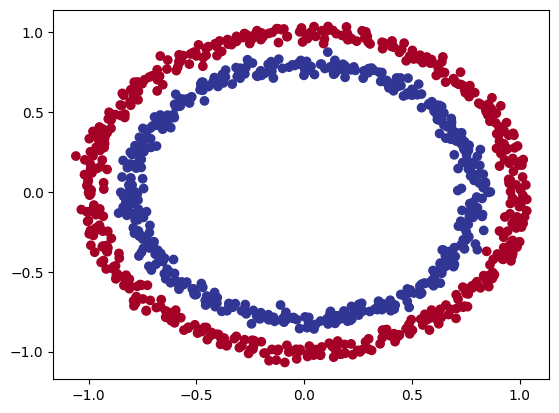

In [ ]:
import matplotlib.pyplot as plt
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.RdYlBu)

## Input and output shapes

In [ ]:
# Check the shapes of our features and labels
X.shape, y.shape

((1000, 2), (1000,))

In [ ]:
# number of samples
len(X), len(y)

(1000, 1000)

In [ ]:
# View 1st example of features and labels
X[0], y[0]

(array([0.75424625, 0.23148074]), 1)

## Steps in modelling

1. Create or import model
2. Compile model
3. Fit model
4. Evaluate model


In [ ]:
import tensorflow as tf

In [ ]:
# Set random seet
tf.random.set_seed(42)

# 1. Create model using Sequential API
model_1 = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

# 2. Compile model
model_1.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.SGD(),
                metrics=["accuracy"])

# 3. Fit model
model_1.fit(X, y, epochs=5)

Epoch 1/5
32/32 [==============================] - 2s 3ms/step - loss: 4.2893 - accuracy: 0.4620
Epoch 2/5
32/32 [==============================] - 0s 3ms/step - loss: 3.2159 - accuracy: 0.4730
Epoch 3/5
32/32 [==============================] - 0s 3ms/step - loss: 0.7597 - accuracy: 0.4960
Epoch 4/5
32/32 [==============================] - 0s 3ms/step - loss: 0.7116 - accuracy: 0.4970
Epoch 5/5
32/32 [==============================] - 0s 4ms/step - loss: 0.7004 - accuracy: 0.4920


In [ ]:
# Train model for longer
model_1.fit(X, y, epochs=200, verbose=0)
model_1.evaluate(X, y)

32/32 [==============================] - 0s 1ms/step - loss: 0.6935 - accuracy: 0.5000


[0.6934831142425537, 0.5]

50% accuracy on a binary classification model indicates that model is just guessing...

In [ ]:
# Add extra layer
tf.random.set_seed(42)

# 1. Create model w/ 2 layers
model_2 = tf.keras.Sequential([
    tf.keras.layers.Dense(1),
    tf.keras.layers.Dense(1)
])

# 2. Compile model
model_2.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.SGD(),
                metrics=["accuracy"])

# 3. Train model
model_2.fit(X, y, epochs=100, verbose=0)

In [ ]:
# 4. Evaluate model
model_2.evaluate(X, y)

32/32 [==============================] - 0s 1ms/step - loss: 0.6932 - accuracy: 0.5000


[0.6932466626167297, 0.5]

## Improving Model

1. Create model - add more layers or increase num of hidden units w/in layer
2. Compile model - choose diff optimization function (Adam instead of SGD)
3. Fit model - train for more epochs

In [ ]:
# Set random seed
tf.random.set_seed(42)

# 1. Create model w/ 3 layers
model_3 = tf.keras.Sequential([
    tf.keras.layers.Dense(100), # add 100 dense neurons
    tf.keras.layers.Dense(10), # add layers w/ 10 neurons
    tf.keras.layers.Dense(1)
])

# 2. Compile model
model_3.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

# 3. Fit model
model_3.fit(X, y, epochs=100, verbose=0)

In [ ]:
# 4. Evaluate model
model_3.evaluate(X, y)

32/32 [==============================] - 0s 2ms/step - loss: 0.6993 - accuracy: 0.5100


[0.6993436217308044, 0.5099999904632568]

Create function to visualize function predictions: 'plot_decision_boundary()'
- Take in trained model, features (X) labels (y)
- Create a meshgrid of diff X vals
- Make predictions across meshgrid
- Plot predictions as well as trends line b/w zones where each unique class falls

In [ ]:
import numpy as np


In [ ]:
def plot_decision_boundary(model, X, y):
  """
  Plots decision boundary created by model predicting on X.
      1. CS231n - https://cs231n.github.io/neural-networks-case-study/
      2. Made with ML basics - https://github.com/GokuMohandas/MadeWithML/blob/main/notebooks/08_Neural_Networks.ipynb
  """
  # Define axis boundaries of plot and create meshgrid
  x_min, x_max = X[:, 0].min() - 0.1, X[:, 0].max() + 0.1
  y_min, y_max = X[:, 1].min() - 0.1, X[:, 1].max() + 0.1

  xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                       np.linspace(y_min, y_max, 100))

  # Create X values (going to predict on these)
  x_in = np.c_[xx.ravel(), yy.ravel()] # Stack 2D arrays together

  # Make predictions
  y_pred = model.predict(x_in)

  # Check for multi-class
  if model.output_shape[-1] > 1:
    print("Multiclass classification")
    # Reshape predictions to get ready for plotting
    y_pred = np.argmax(y_pred, axis=1).reshape(xx.shape)
  else:
    print("Binary classification")
    y_pred = np.round(y_pred).reshape(xx.shape)

  # Plot decisions
  plt.contourf(xx, yy, y_pred, cmap=plt.cm.RdYlBu, alpha=0.7)
  plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.RdYlBu)
  plt.xlim(xx.min(), xx.max())
  plt.ylim(yy.min(), yy.max())

313/313 [==============================] - 1s 1ms/step
Binary classification


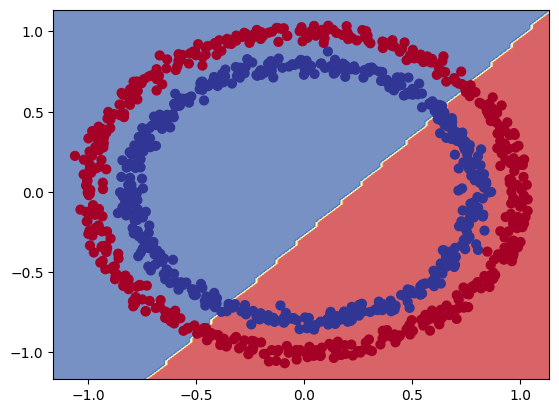

In [ ]:
# Check predictions model is making
plot_decision_boundary(model=model_3,
                       X=X,
                       y=y)

In [ ]:
# Try model on regression data

tf.random.set_seed(42)

# Regression data
X_reg = tf.range(0, 1000, 5)
y_reg = tf.range(100, 1100, 5) # y = X + 100
X_reg, y_reg

# Split data into training and test sets
X_reg_train = X_reg[:150]
X_reg_test = X_reg[150:]
y_reg_train = y_reg[:150]
y_reg_test = y_reg[150:]

# Fit model
model_3.fit(tf.expand_dims(X_reg_train, axis=-1), y_reg_train, epochs=100)

Epoch 1/100


ValueError: ignored

model_3 developed for binary classification problem which uses loss=BinaryCrossentropy, but regression problem requires a loss function usually of mae or mse

In [ ]:
# rand seed
tf.random.set_seed(42)

# 1. Create model
model_3 = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

# 2. Compile model w/ regression specific loss function
model_3.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["mae"])

# 3. Fit model
model_3.fit(tf.expand_dims(X_reg_train, axis=-1), y_reg_train, epochs=100)

Epoch 1/100
5/5 [==============================] - 1s 6ms/step - loss: 561.7545 - mae: 561.7545
Epoch 2/100
5/5 [==============================] - 0s 4ms/step - loss: 465.2838 - mae: 465.2838
Epoch 3/100
5/5 [==============================] - 0s 4ms/step - loss: 373.2635 - mae: 373.2635
Epoch 4/100
5/5 [==============================] - 0s 3ms/step - loss: 277.8554 - mae: 277.8554
Epoch 5/100
5/5 [==============================] - 0s 4ms/step - loss: 178.1686 - mae: 178.1686
Epoch 6/100
5/5 [==============================] - 0s 4ms/step - loss: 72.5185 - mae: 72.5185
Epoch 7/100
5/5 [==============================] - 0s 4ms/step - loss: 67.0914 - mae: 67.0914
Epoch 8/100
5/5 [==============================] - 0s 4ms/step - loss: 81.4603 - mae: 81.4603
Epoch 9/100
5/5 [==============================] - 0s 4ms/step - loss: 61.2050 - mae: 61.2050
Epoch 10/100
5/5 [==============================] - 0s 5ms/step - loss: 45.7646 - mae: 45.7646
Epoch 11/100
5/5 [==============================]

2/2 [==============================] - 0s 5ms/step


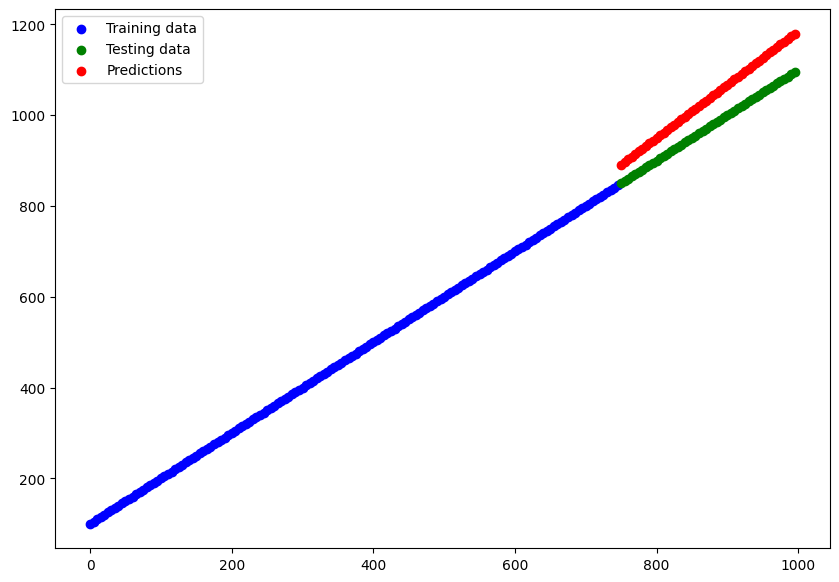

In [ ]:
# Make predictions w/ trained model
y_reg_preds = model_3.predict(X_reg_test)

# Plot model's predictions against data
plt.figure(figsize=(10,7))
plt.scatter(X_reg_train, y_reg_train, c="b", label="Training data")
plt.scatter(X_reg_test, y_reg_test, c="g", label="Testing data")
plt.scatter(X_reg_test, y_reg_preds, c="r", label="Predictions")
plt.legend();

## Non-linearity

In [ ]:
# Rebuild this model: https://playground.tensorflow.org/#activation=linear&batchSize=10&dataset=circle&regDataset=reg-plane&learningRate=0.001&regularizationRate=0&noise=0&networkShape=1&seed=0.26333&showTestData=false&discretize=false&percTrainData=50&x=true&y=true&xTimesY=false&xSquared=false&ySquared=false&cosX=false&sinX=false&cosY=false&sinY=false&collectStats=false&problem=classification&initZero=false&hideText=false
# Rand seed
tf.random.set_seed(42)

# 1. Create model
model_4 = tf.keras.Sequential([
    tf.keras.layers.Dense(1, activation="linear")
])

# 2. Compile model
model_4.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(lr=0.001),
                metrics=["accuracy"])

# 3. Fit model
history = model_4.fit(X, y, epochs=100)

Epoch 1/100
32/32 [==============================] - 1s 2ms/step - loss: 5.9487 - accuracy: 0.4820
Epoch 2/100
32/32 [==============================] - 0s 2ms/step - loss: 5.9309 - accuracy: 0.4830
Epoch 3/100
32/32 [==============================] - 0s 2ms/step - loss: 5.9178 - accuracy: 0.4840
Epoch 4/100
32/32 [==============================] - 0s 2ms/step - loss: 5.9078 - accuracy: 0.4840
Epoch 5/100
32/32 [==============================] - 0s 2ms/step - loss: 5.9243 - accuracy: 0.4850
Epoch 6/100
32/32 [==============================] - 0s 3ms/step - loss: 5.9246 - accuracy: 0.4850
Epoch 7/100
32/32 [==============================] - 0s 2ms/step - loss: 5.9245 - accuracy: 0.4850
Epoch 8/100
32/32 [==============================] - 0s 2ms/step - loss: 5.9244 - accuracy: 0.4850
Epoch 9/100
32/32 [==============================] - 0s 2ms/step - loss: 5.9242 - accuracy: 0.4850
Epoch 10/100
32/32 [==============================] - 0s 2ms/step - loss: 5.9241 - accuracy: 0.4850
Epoch 11/

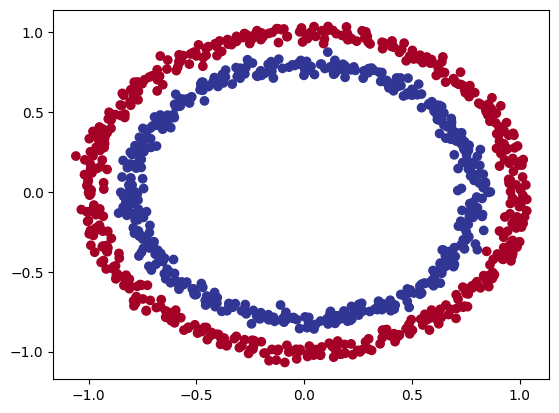

In [ ]:
# Visualize data
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.RdYlBu)

313/313 [==============================] - 0s 1ms/step
Binary classification


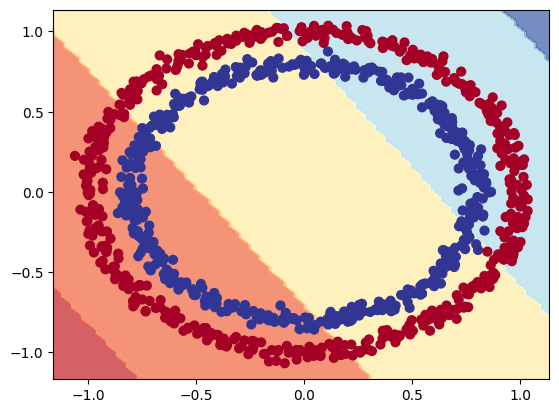

In [ ]:
# Decision boundary for latest model
plot_decision_boundary(model_4, X, y)

Use non-linear activation function

In [ ]:
# Set rand seed
tf.random.set_seed(42)

# 1. Create model w/ non-linear activation function (anything but linear activation)
model_5 = tf.keras.Sequential([
    tf.keras.layers.Dense(1, activation="relu")
])

# 2. Compile model
model_5.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(lr=0.001),
                metrics=["accuracy"])

# 3. Fit model
history = model_5.fit(X, y, epochs=100)

Epoch 1/100
32/32 [==============================] - 1s 2ms/step - loss: 5.1397 - accuracy: 0.4790
Epoch 2/100
32/32 [==============================] - 0s 2ms/step - loss: 4.9850 - accuracy: 0.4760
Epoch 3/100
32/32 [==============================] - 0s 2ms/step - loss: 4.7403 - accuracy: 0.4770
Epoch 4/100
32/32 [==============================] - 0s 2ms/step - loss: 4.5841 - accuracy: 0.4780
Epoch 5/100
32/32 [==============================] - 0s 2ms/step - loss: 4.5508 - accuracy: 0.4770
Epoch 6/100
32/32 [==============================] - 0s 2ms/step - loss: 4.5066 - accuracy: 0.4770
Epoch 7/100
32/32 [==============================] - 0s 3ms/step - loss: 4.4891 - accuracy: 0.4770
Epoch 8/100
32/32 [==============================] - 0s 2ms/step - loss: 4.4806 - accuracy: 0.4750
Epoch 9/100
32/32 [==============================] - 0s 2ms/step - loss: 4.4643 - accuracy: 0.4730
Epoch 10/100
32/32 [==============================] - 0s 2ms/step - loss: 4.4582 - accuracy: 0.4730
Epoch 11/

313/313 [==============================] - 0s 1ms/step
Binary classification


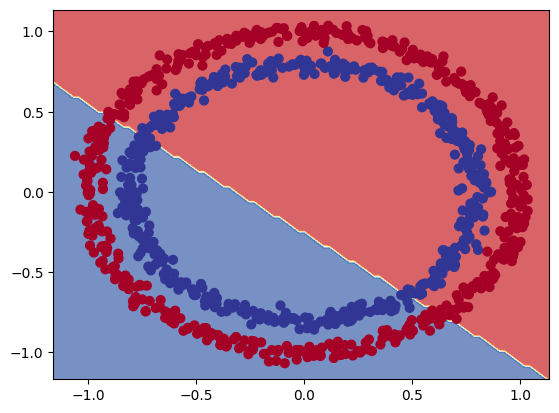

In [ ]:
plot_decision_boundary(model_5, X, y)

In [ ]:
# Set rand seed
tf.random.set_seed(42)

# https://playground.tensorflow.org/#activation=relu&batchSize=10&dataset=circle&regDataset=reg-plane&learningRate=0.01&regularizationRate=0&noise=0&networkShape=5,3,1&seed=0.26333&showTestData=false&discretize=false&percTrainData=50&x=true&y=true&xTimesY=false&xSquared=false&ySquared=false&cosX=false&sinX=false&cosY=false&sinY=false&collectStats=false&problem=classification&initZero=false&hideText=false
# 1. Create model
model_6 = tf.keras.Sequential([
    tf.keras.layers.Dense(5, activation="relu"),
    tf.keras.layers.Dense(3, activation="relu"),
    tf.keras.layers.Dense(1, activation="sigmoid")
])

# 2. Compile model
model_6.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(lr=0.01),
                metrics=["accuracy"])

# 3. Fit model
history = model_6.fit(X, y, epochs=200)

Epoch 1/200
32/32 [==============================] - 1s 2ms/step - loss: 0.6947 - accuracy: 0.4990
Epoch 2/200
32/32 [==============================] - 0s 2ms/step - loss: 0.6927 - accuracy: 0.5040
Epoch 3/200
32/32 [==============================] - 0s 2ms/step - loss: 0.6912 - accuracy: 0.5040
Epoch 4/200
32/32 [==============================] - 0s 2ms/step - loss: 0.6898 - accuracy: 0.5090
Epoch 5/200
32/32 [==============================] - 0s 2ms/step - loss: 0.6886 - accuracy: 0.5100
Epoch 6/200
32/32 [==============================] - 0s 2ms/step - loss: 0.6874 - accuracy: 0.5110
Epoch 7/200
32/32 [==============================] - 0s 2ms/step - loss: 0.6861 - accuracy: 0.5110
Epoch 8/200
32/32 [==============================] - 0s 2ms/step - loss: 0.6851 - accuracy: 0.5190
Epoch 9/200
32/32 [==============================] - 0s 2ms/step - loss: 0.6840 - accuracy: 0.5270
Epoch 10/200
32/32 [==============================] - 0s 2ms/step - loss: 0.6829 - accuracy: 0.5520
Epoch 11/

313/313 [==============================] - 0s 1ms/step
Binary classification


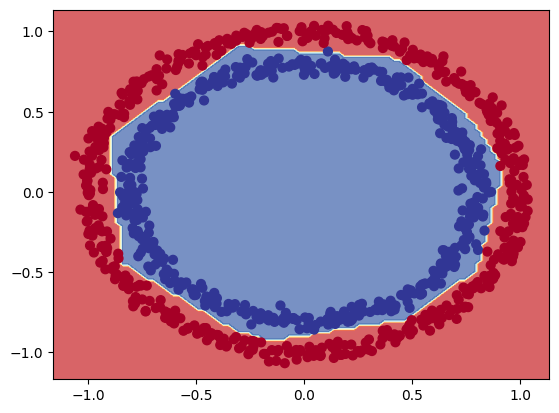

In [ ]:
plot_decision_boundary(model_6, X, y)

In [ ]:
# https://playground.tensorflow.org/#activation=relu&batchSize=10&dataset=circle&regDataset=reg-plane&learningRate=0.001&regularizationRate=0&noise=0&networkShape=4,4&seed=0.26333&showTestData=false&discretize=false&percTrainData=50&x=true&y=true&xTimesY=false&xSquared=false&ySquared=false&cosX=false&sinX=false&cosY=false&sinY=false&collectStats=false&problem=classification&initZero=false&hideText=false

# Set rand seed
tf.random.set_seed(42)

# 1. Create model
model_7 = tf.keras.Sequential([
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(1)
])

# 2. Compile model
model_7.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(lr=0.001),
                metrics=["accuracy"])

# 3. Fit model
history = model_7.fit(X, y, epochs=100)

Epoch 1/100
32/32 [==============================] - 1s 2ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 2/100
32/32 [==============================] - 0s 2ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 3/100
32/32 [==============================] - 0s 3ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 4/100
32/32 [==============================] - 0s 3ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 5/100
32/32 [==============================] - 0s 3ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 6/100
32/32 [==============================] - 0s 3ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 7/100
32/32 [==============================] - 0s 3ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 8/100
32/32 [==============================] - 0s 2ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 9/100
32/32 [==============================] - 0s 2ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 10/100
32/32 [==============================] - 0s 2ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 11/

In [ ]:
model_7.evaluate(X, y)

32/32 [==============================] - 0s 3ms/step - loss: 7.7125 - accuracy: 0.5000


[7.712474346160889, 0.5]

313/313 [==============================] - 1s 2ms/step
Binary classification


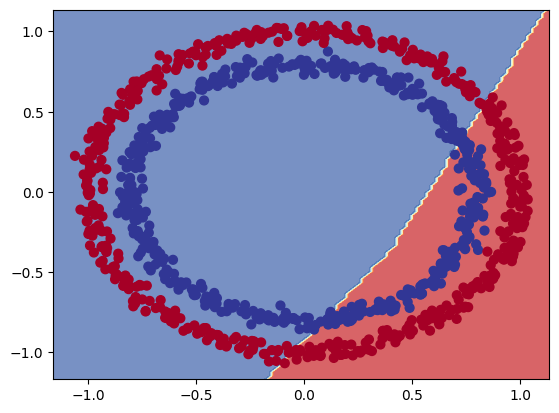

In [ ]:
plot_decision_boundary(model_7, X, y)

In [ ]:
# Output layer has diff activation function

# Set rand seed
tf.random.set_seed(42)

# 1. Create model
model_8 = tf.keras.Sequential([
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(1, activation="sigmoid")
])

# 2. Compile model
model_8.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(lr=0.001),
                metrics=["accuracy"])

# 3. Fit model
history = model_8.fit(X, y, epochs=100)

Epoch 1/100
32/32 [==============================] - 1s 2ms/step - loss: 0.6925 - accuracy: 0.5130
Epoch 2/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6910 - accuracy: 0.5170
Epoch 3/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6897 - accuracy: 0.5080
Epoch 4/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6886 - accuracy: 0.5120
Epoch 5/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6877 - accuracy: 0.5150
Epoch 6/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6867 - accuracy: 0.5160
Epoch 7/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6853 - accuracy: 0.5260
Epoch 8/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6843 - accuracy: 0.5270
Epoch 9/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6830 - accuracy: 0.5350
Epoch 10/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6819 - accuracy: 0.5330
Epoch 11/

In [ ]:
model_8.evaluate(X, y)

32/32 [==============================] - 0s 1ms/step - loss: 0.2386 - accuracy: 0.9810


[0.23858359456062317, 0.9810000061988831]

313/313 [==============================] - 0s 1ms/step
Binary classification


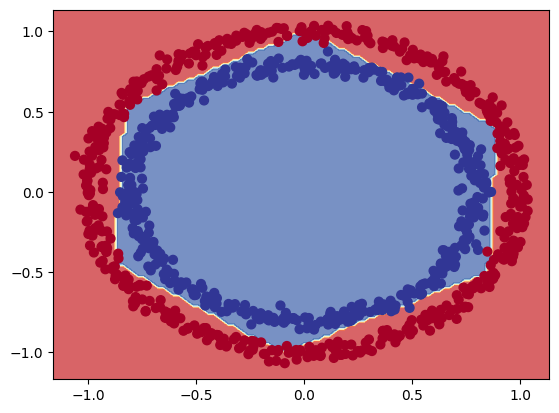

In [ ]:
plot_decision_boundary(model_8, X, y)

In [ ]:
# Creating a tensor to visualize non-linear and linear activation functions
A = tf.cast(tf.range(-10, 10), tf.float32)
A

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([-10.,  -9.,  -8.,  -7.,  -6.,  -5.,  -4.,  -3.,  -2.,  -1.,   0.,
         1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.],
      dtype=float32)>

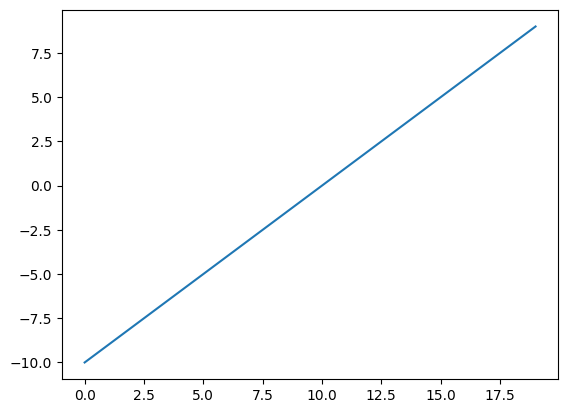

In [ ]:
# Visualize tensor
plt.plot(A)

In [ ]:
# Replicating sigmoid function: sigmoid(x) = 1 / (1 + e^(-x))
def sigmoid(x):
  return 1 / (1 + tf.exp(-x)) # where tf.exp = Computes exponential of x element-wise y = e^x.

# Use sigmoid on tensor A
sigmoid(A)

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([4.5397872e-05, 1.2339458e-04, 3.3535014e-04, 9.1105117e-04,
       2.4726233e-03, 6.6928510e-03, 1.7986210e-02, 4.7425874e-02,
       1.1920292e-01, 2.6894143e-01, 5.0000000e-01, 7.3105860e-01,
       8.8079703e-01, 9.5257413e-01, 9.8201376e-01, 9.9330717e-01,
       9.9752742e-01, 9.9908900e-01, 9.9966466e-01, 9.9987662e-01],
      dtype=float32)>

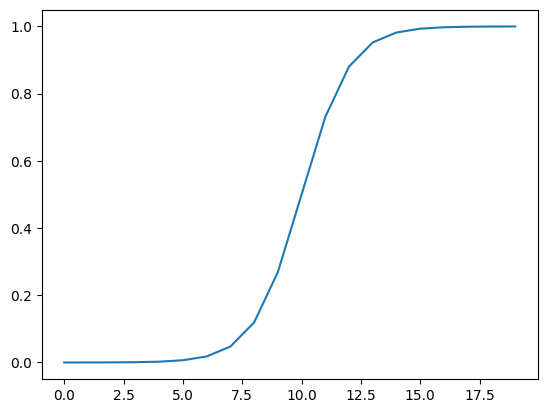

In [ ]:
# Plot tensor
plt.plot(sigmoid(A))

In [ ]:
# Relu function
def relu(x):
  return tf.maximum(0, x)

# Call relu on tensor A
relu(A)

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 2., 3., 4., 5., 6.,
       7., 8., 9.], dtype=float32)>

In [ ]:
A

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([-10.,  -9.,  -8.,  -7.,  -6.,  -5.,  -4.,  -3.,  -2.,  -1.,   0.,
         1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.],
      dtype=float32)>

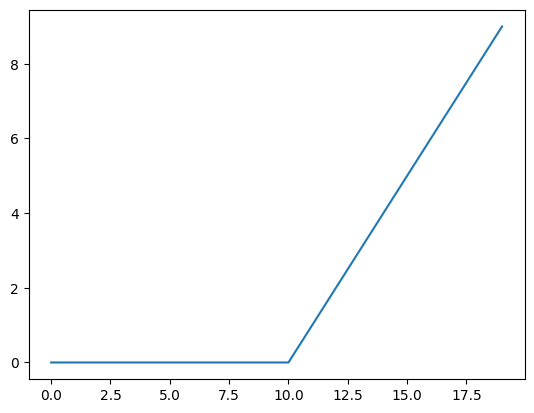

In [ ]:
# Plot ReLU-modified tensor
plt.plot(relu(A))

In [ ]:
# Linear activation function
tf.keras.activations.linear(A)

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([-10.,  -9.,  -8.,  -7.,  -6.,  -5.,  -4.,  -3.,  -2.,  -1.,   0.,
         1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.],
      dtype=float32)>

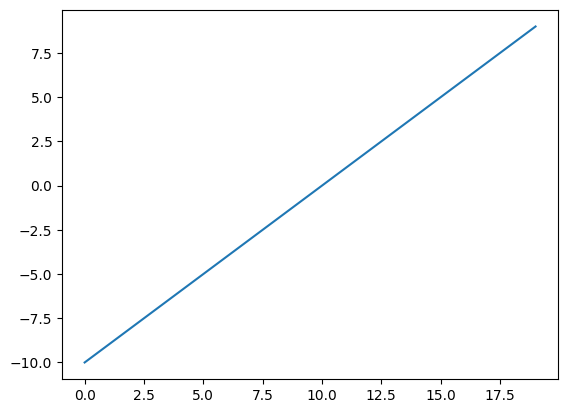

In [ ]:
plt.plot(tf.keras.activations.linear(A))

In [ ]:
# Check if it equals original tensor
A == tf.keras.activations.linear(A)

<tf.Tensor: shape=(20,), dtype=bool, numpy=
array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True])>

## Evaluating and improving classification model

- Create a training and testing set

In [ ]:
# Check length of examples of dataset
len(X)

1000

In [ ]:
# Split into train and test sets
X_train, y_train = X[:800], y[:800]
X_test, y_test = X[800:], y[800:]

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((800, 2), (200, 2), (800,), (200,))

In [ ]:
# Recreate model to fit on training data and evaluate on testing data

# Set rand seed
tf.random.set_seed(42)

# 1. Create model (same as model 8)
model_9 = tf.keras.Sequential([
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(1, activation="sigmoid")
])

# 2. Compile model
model_9.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(lr=0.01),
                metrics=["accuracy"])

# 3. Fit model
history = model_9.fit(X_train, y_train, epochs=100)

Epoch 1/100
25/25 [==============================] - 1s 2ms/step - loss: 0.6927 - accuracy: 0.5200
Epoch 2/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6912 - accuracy: 0.5213
Epoch 3/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6900 - accuracy: 0.5238
Epoch 4/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6890 - accuracy: 0.5275
Epoch 5/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6879 - accuracy: 0.5263
Epoch 6/100
25/25 [==============================] - 0s 3ms/step - loss: 0.6874 - accuracy: 0.5387
Epoch 7/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6865 - accuracy: 0.5387
Epoch 8/100
25/25 [==============================] - 0s 3ms/step - loss: 0.6859 - accuracy: 0.5525
Epoch 9/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6854 - accuracy: 0.5450
Epoch 10/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6847 - accuracy: 0.5688
Epoch 11/

In [ ]:
model_9.evaluate(X_test, y_test)

7/7 [==============================] - 0s 3ms/step - loss: 0.4781 - accuracy: 0.9800


[0.4780820906162262, 0.9800000190734863]

313/313 [==============================] - 1s 2ms/step
Binary classification
313/313 [==============================] - 1s 2ms/step
Binary classification


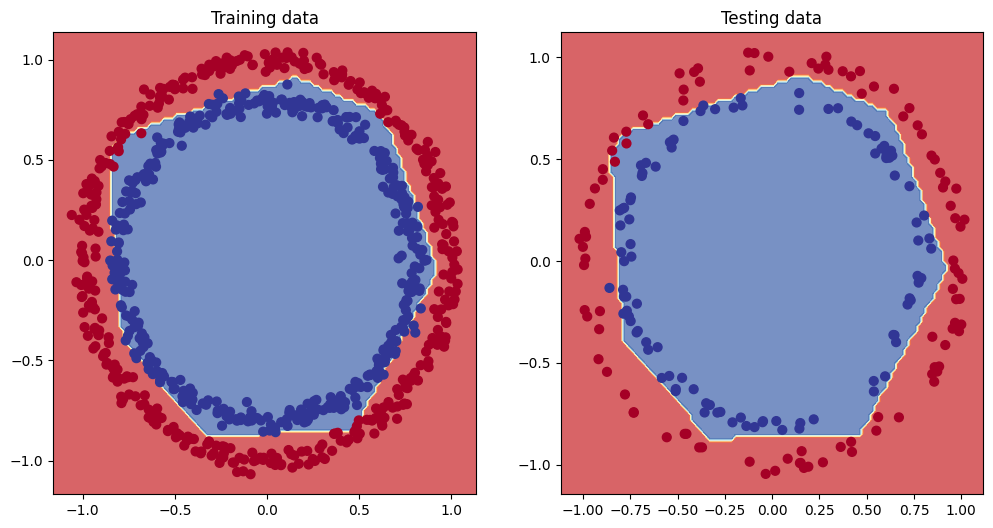

In [ ]:
# Plot decision boundary for training and test set
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Training data")
plot_decision_boundary(model_9, X=X_train, y=y_train)
plt.subplot(1, 2, 2)
plt.title("Testing data")
plot_decision_boundary(model_9, X=X_test, y=y_test)
plt.show()

## Plot loss and training curves

In [ ]:
# Convert history object into datafram
pd.DataFrame(history.history)

,loss,accuracy
0,0.692707,0.52000
1,0.691213,0.52125
2,0.689985,0.52375
3,0.688966,0.52750
4,0.687929,0.52625
...,...,...
95,0.506093,0.95250
96,0.501469,0.95375
97,0.495479,0.96375
98,0.489996,0.96500


Text(0.5, 1.0, 'Model_9 loss curve')

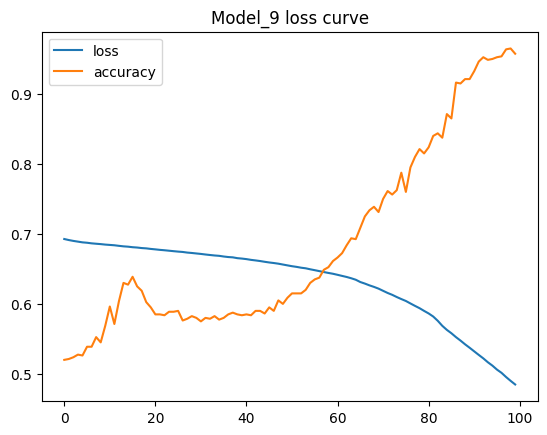

In [ ]:
# Plot loss curves
pd.DataFrame(history.history).plot()
plt.title("Model_9 loss curve")

## Finding best learning rate

to find ideal learning rate where loss decreases most during training:
- learning rate **callback**: extra piece of functionality while model is training
- Another model (different than one above)
- modified loss curves plot

In [ ]:
# Set rand seed
tf.random.set_seed(42)

# 1. Create model (same as model_9)
model_9 = tf.keras.Sequential([
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(1, activation="sigmoid")
])

# 2. Compile model
model_9.compile(loss="binary_crossentropy",
                optimizer="Adam",
                metrics=["accuracy"])

# Create learning rate callback
lr_scheduler = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-4 * 10**(epoch/20))
# Every epoch: traverse a set of lr values starting from 1e-4 increasing by 10*(epoch/20)

# 3. Fit model (passing lr_scheduler callback)
history_9 = model_9.fit(X_train,
                        y_train,
                        epochs=100,
                        callbacks=[lr_scheduler])

Epoch 1/100
25/25 [==============================] - 1s 2ms/step - loss: 0.7291 - accuracy: 0.5050 - lr: 1.0000e-04
Epoch 2/100
25/25 [==============================] - 0s 2ms/step - loss: 0.7280 - accuracy: 0.5025 - lr: 1.1220e-04
Epoch 3/100
25/25 [==============================] - 0s 2ms/step - loss: 0.7269 - accuracy: 0.5013 - lr: 1.2589e-04
Epoch 4/100
25/25 [==============================] - 0s 2ms/step - loss: 0.7257 - accuracy: 0.5025 - lr: 1.4125e-04
Epoch 5/100
25/25 [==============================] - 0s 2ms/step - loss: 0.7244 - accuracy: 0.4988 - lr: 1.5849e-04
Epoch 6/100
25/25 [==============================] - 0s 2ms/step - loss: 0.7232 - accuracy: 0.4975 - lr: 1.7783e-04
Epoch 7/100
25/25 [==============================] - 0s 2ms/step - loss: 0.7217 - accuracy: 0.5000 - lr: 1.9953e-04
Epoch 8/100
25/25 [==============================] - 0s 3ms/step - loss: 0.7202 - accuracy: 0.4988 - lr: 2.2387e-04
Epoch 9/100
25/25 [==============================] - 0s 2ms/step - loss:

<Axes: xlabel='epochs'>

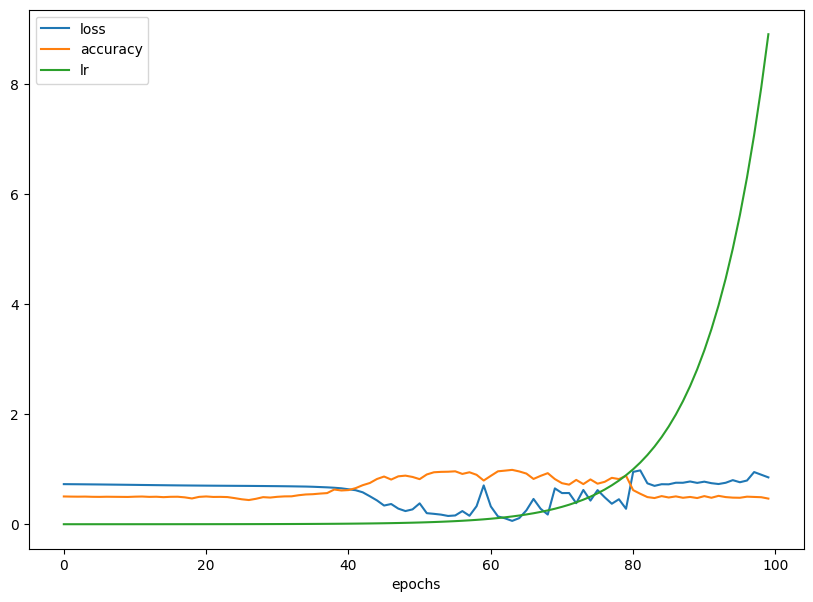

In [ ]:
# Checkout history
pd.DataFrame(history_9.history).plot(figsize=(10, 7), xlabel="epochs")


Look for area where loss decrease is the steepest that's the ideal lr

Text(0.5, 1.0, 'Learning Rate vs Loss')

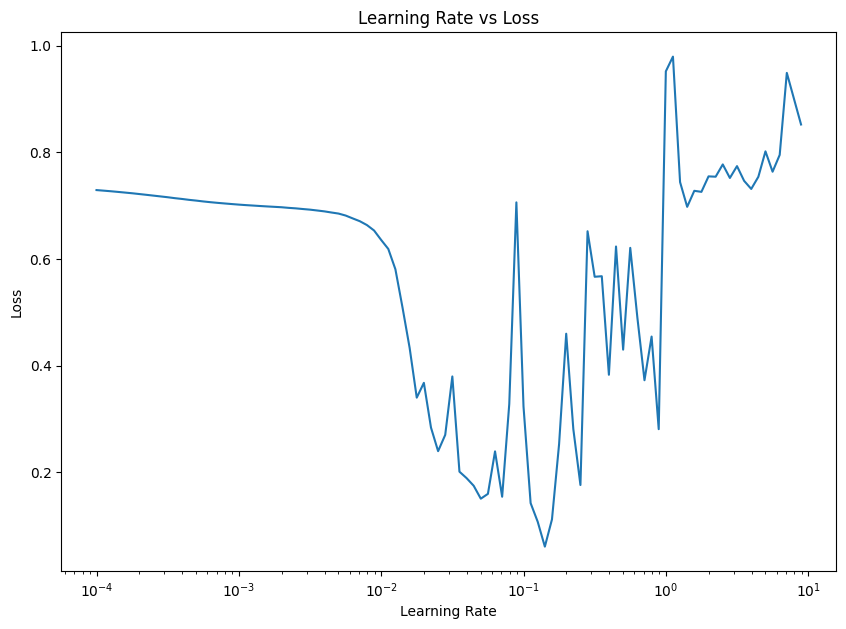

In [ ]:
# Plot lr versus loss
lrs = 1e-4 * (10 ** (tf.range(100)/20))
plt.figure(figsize=(10, 7))
plt.semilogx(lrs, history_9.history["loss"])
plt.xlabel("Learning Rate")
plt.ylabel("Loss")
plt.title("Learning Rate vs Loss")

In [ ]:
# Example of other typical learning rate values:

10**0, 10**-1, 10**-2, 10**-3, 1e-4

(1, 0.1, 0.01, 0.001, 0.0001)

In [ ]:
# Try using ideal lr of 0.02

# Set rand seed
tf.random.set_seed(42)

# Create model
model_10 = tf.keras.Sequential([
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(1, activation="sigmoid")
])

# Compile model
model_10.compile(loss="binary_crossentropy",
                 optimizer=tf.keras.optimizers.Adam(lr=0.02),
                 metrics=["accuracy"])

# Fit model
history_10 = model_10.fit(X_train, y_train, epochs=100)




Epoch 1/100
25/25 [==============================] - 1s 3ms/step - loss: 0.7004 - accuracy: 0.4850
Epoch 2/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6984 - accuracy: 0.4800
Epoch 3/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6969 - accuracy: 0.4650
Epoch 4/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6956 - accuracy: 0.4750
Epoch 5/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6946 - accuracy: 0.4913
Epoch 6/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6936 - accuracy: 0.4850
Epoch 7/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6924 - accuracy: 0.4850
Epoch 8/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6916 - accuracy: 0.4925
Epoch 9/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6906 - accuracy: 0.5288
Epoch 10/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6897 - accuracy: 0.5412
Epoch 11/

In [ ]:
# Evaluate model 10 on test data set
model_10.evaluate(X_test, y_test)

7/7 [==============================] - 1s 12ms/step - loss: 0.3306 - accuracy: 0.9750


[0.33058685064315796, 0.9750000238418579]

In [ ]:
# Evaluate model 9 on test data
model_8.evaluate(X_test, y_test)

7/7 [==============================] - 0s 4ms/step - loss: 0.2344 - accuracy: 0.9800


[0.23436912894248962, 0.9800000190734863]

313/313 [==============================] - 2s 4ms/step
Binary classification
313/313 [==============================] - 0s 1ms/step
Binary classification


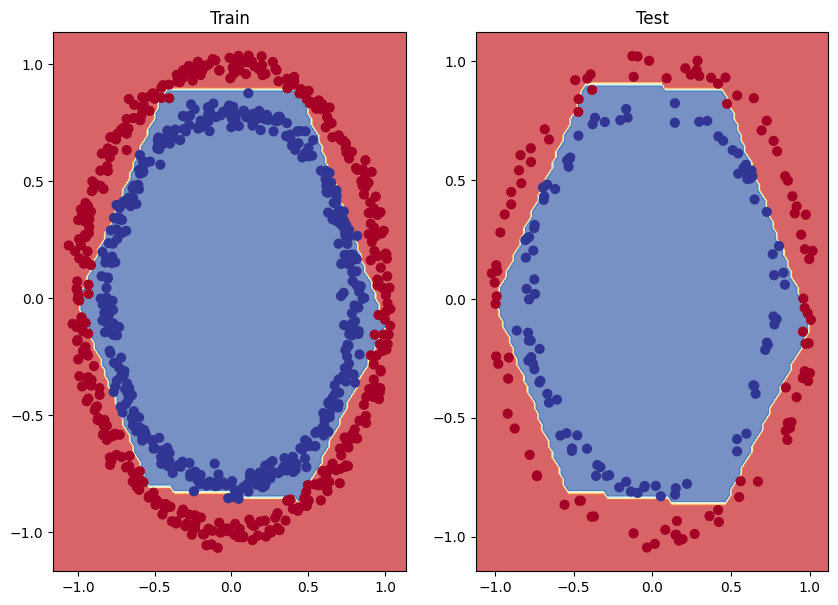

In [ ]:
# Plot decision boundary for training and test sets
plt.figure(figsize=(10, 7))
plt.subplot(1, 2, 1)
plt.title("Train")
plot_decision_boundary(model_10, X=X_train, y=y_train)
plt.subplot(1, 2, 2,)
plt.title("Test")
plot_decision_boundary(model_10, X=X_test, y=y_test)
plt.show()

## More classification evaluation methods
- Accuracy
- Precision
- Recall
- F1-score
- Confusion matrix
- Classification report (from scikit-learn)

In [ ]:
# Check accuracy of model
loss, accuracy = model_10.evaluate(X_test, y_test)
print(f"Model loss on test set: {loss}")
print(f"Model accuracy on test set: {(accuracy*100):.2f}%")

7/7 [==============================] - 0s 7ms/step - loss: 0.3306 - accuracy: 0.9750
Model loss on test set: 0.33058685064315796
Model accuracy on test set: 97.50%


Confusion matrix

In [ ]:
# Create confusion matrix
from sklearn.metrics import confusion_matrix

# Make predictions
y_preds = model_10.predict(X_test)

# Create confusion matrix
confusion_matrix(y_test, y_preds)

7/7 [==============================] - 0s 3ms/step


ValueError: ignored

In [ ]:
y_test[:10], y_preds[:10]

(array([1, 1, 1, 1, 0, 0, 1, 0, 1, 0]),
 array([[0.5983497 ],
        [0.83984524],
        [0.8067587 ],
        [0.74333566],
        [0.5271414 ],
        [0.33380672],
        [0.54964834],
        [0.4198511 ],
        [0.6729117 ],
        [0.13036443]], dtype=float32))

Predictions array dtype = prediction probability form float32 which is the standard output from the sigmoid (or softmax) activation functions

In [ ]:
# Convert prediction probabilities to binary format
tf.round(y_preds)[:10]

<tf.Tensor: shape=(10, 1), dtype=float32, numpy=
array([[1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [1.],
       [0.],
       [1.],
       [0.]], dtype=float32)>

In [ ]:
# Create confusion matrix
confusion_matrix(y_test, tf.round(y_preds))

array([[96,  5],
       [ 0, 99]])

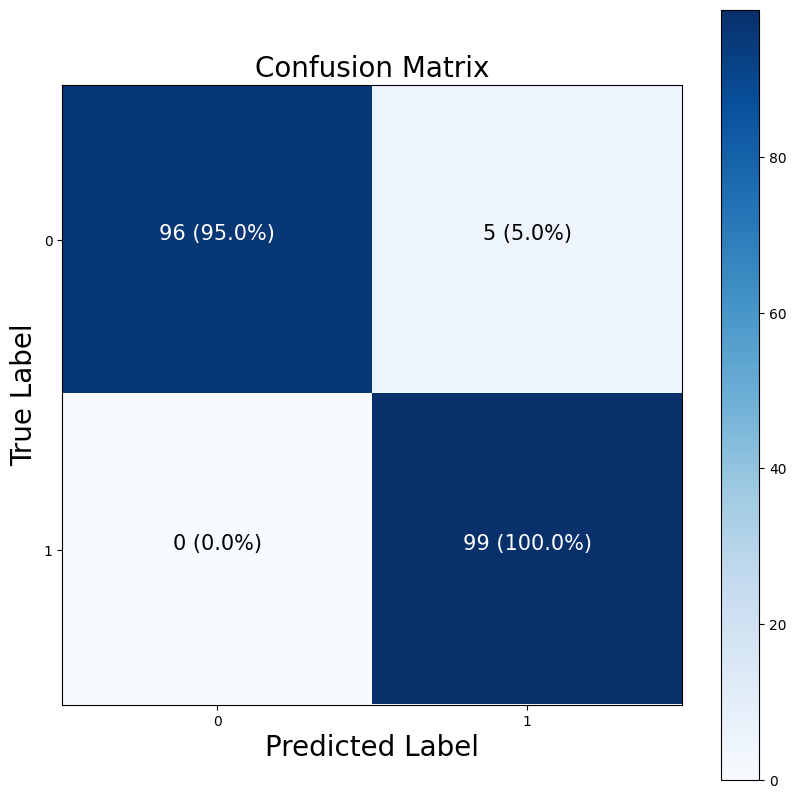

In [ ]:
# Following code is similar to scikit-learn plot_confusion_matrix
# https://scikit-learn.org/1.0/modules/generated/sklearn.metrics.plot_confusion_matrix.html

import itertools

figsize = (10, 10)

# Create confusion matrix
cm = confusion_matrix(y_test, tf.round(y_preds))
cm_norm = cm.astype("float") / cm.sum(axis=1)[:, np.newaxis] # normalize confusion matrix
n_classes = cm.shape[0]

fig, ax = plt.subplots(figsize=figsize)
# Create a matrix plot
cax = ax.matshow(cm, cmap=plt.cm.Blues)
fig.colorbar(cax)

# Create classes
classes = False

if classes:
  labels = classes
else:
  labels = np.arange(cm.shape[0])

# Label axes
ax.set(title="Confusion Matrix",
       xlabel="Predicted Label",
       ylabel="True Label",
       xticks=np.arange(n_classes),
       yticks=np.arange(n_classes),
       xticklabels=labels,
       yticklabels=labels)

# Set threshold for diff colors
threshold = (cm.max() + cm.min()) / 2

# Set x-axis labels to bottom
ax.xaxis.set_label_position("bottom")
ax.xaxis.tick_bottom()

# Adjust label size
ax.yaxis.label.set_size(20)
ax.xaxis.label.set_size(20)
ax.title.set_size(20)

# Plot text on each cell
for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
  plt.text(j, i , f"{cm[i, j]} ({cm_norm[i, j]*100:.1f}%)",
           horizontalalignment="center",
           color="white" if cm[i, j] > threshold else "black",
           size=15)